As a roadmap, I will be utilizing code from the notebook8 but explaining steps throughout. My understanding is that the dataset provided will be used to train the model, of which the output is the third column (color). I will train the model using the provided data and then evaluate how accurately it predicted the color (which I can see). 

Then, theoretically, another dataset exists by which the model's performance will be evaluated. I do not have access to the test dataset (unless I split the existing dataset into training/test sets). It is my understanding the the TA will evaluate the model (however far I get) by using his hidden test set. 

In [0]:
from sklearn import preprocessing
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split


# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}


# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w",
          "edgecolor" : "k",}

# use LaTeX fonts in the plot
plt.rc('text', usetex=False)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font)

# Set the figure parameters
plt.rc("figure", **figure)

We will be predicting the color of dot based on the values of the two features. So the target would be in the color column (as I am structuring the data into a pd dataframe with column names "feature_1", "feature_2", and "color").

I will be plotting the data according to this format to ensure that it lines up with the given information on the homework sheet. The first two columns will represent the x and y axes and the last column will dictate the color of the plotted points.

In [3]:
import pandas as pd
import numpy as np

headers = ["feature_1", "feature_2", "color"]

df = pd.read_csv("https://abtinshahidi.github.io/files/train_set.txt",
                  header=None, names=headers, na_values="?" )
df.head()

,feature_1,feature_2,color
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


In [4]:
df["feature_1"].mean()

0.596296010852416

In [5]:
df["feature_2"].mean()

1.0790705154597384

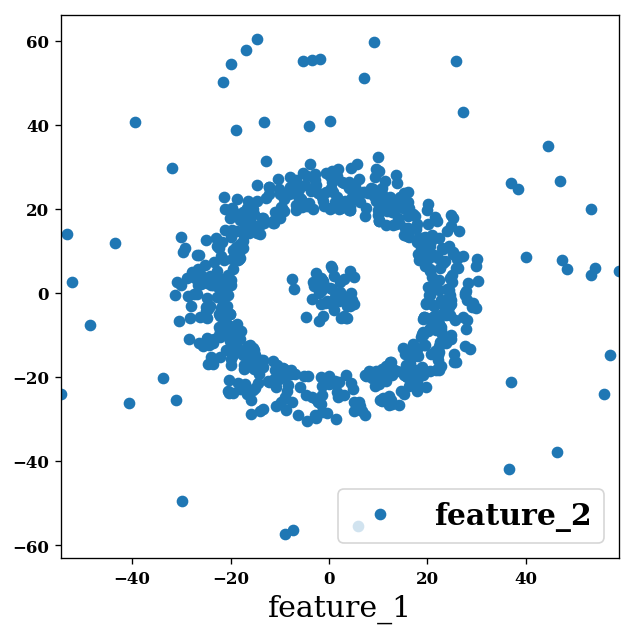

In [6]:
df.plot(x='feature_1', y='feature_2', style='o')

Setting column 3 values to dictate color...

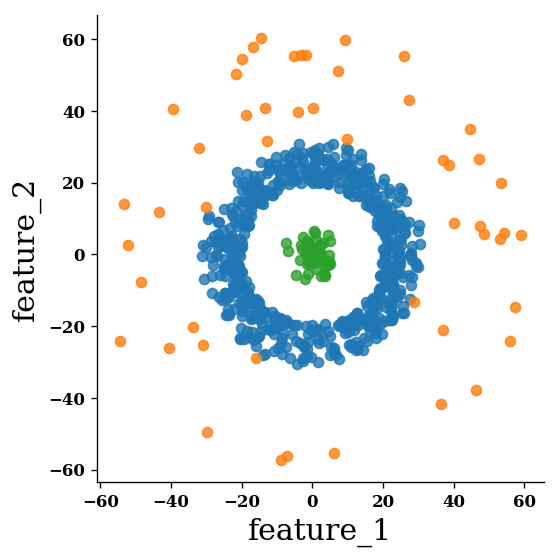

In [7]:
import seaborn as sns
headers2 = ["feature_1", "feature_2", "color"]

df2 = pd.read_csv("https://abtinshahidi.github.io/files/train_set.txt",
                  header=None, names=headers, na_values="?" )
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="feature_1", y="feature_2", data=df2, fit_reg=False, hue='color', legend=False)


Setting definitions for activations and functions occuring within net. 


**Key Callouts:** The weights need to be randomly assigned initially (below), but will be optimized and refined later through back-propagation.

"dot" definition will be allowing us to multiply the matrices (through layers).

"sigmoid" will be initialized and used to give us real-valued output in the format of a smooth function (derivatives are easily taken from a sigmoid due to smoothness).

A variety of activation functions are defined: sigmoid (more smooth, see above), ReLU (rectified linear unit, has more advantageous gradient which can be more helpful than sigmoid activation function on large or noisy datasets), exponential (means tend towards 0 which can make the analysis faster; might not be necessary in this case), and lastly the leaky ReLU (when the tradient becomes inactive, the leaky ReLU inflates it a little bit as can be seen by the alpha value of 0.01).





In [0]:
def dot(X, Y):
   
    return sum(x * y for x, y in zip(X, Y))

def add_vectors(a, b):
    """addition of two vectors by adding every component."""
    from operator import add
    return tuple(map(add, a, b))


def product_scalar_vector(X, Y):
    """Return vector as a product of a scalar and a vector"""
    return [X * y for y in Y]


def softmax(X, j):
    from math import exp
    d = sum([exp(x) for x in X])
    return exp(X[j])/d

def softmax_derivative(X, dj, i):
    if dj == i:
        return X[i] * (1 - X[j])
    else:
        return - X[i] * X[j]
        
def stablesoftmax(x):
    """Compute the softmax of vector x in a numerically stable way."""
    import numpy as np
    shiftx = x - np.max(x)
    exps = np.exp(shiftx)
    return exps / np.sum(exps)

def sigmoid(x):
    """Sigmoid function activation"""
    from math import exp
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        from numpy import exp
        return 1 / (1 + exp(-x))

def sigmoid_derivative(value):
    return value * (1 - value)



def rectified_LU(x):
    """
    Rectified Linear Unit (ReLU) activation
    """
    return max(0, x)

def rectified_LU_derivative(value):
    if value > 0:
        return 1
    else:
        return 0


    
def exponential_LU(x, alpha=0.01):
    """
    Exponential Linear Unit (ELU) activation
    """
    from math import exp
    if x > 0:
        return x
    else:
        return alpha * (exp(x) - 1)

    
def exponential_LU_derivative(value, alpha = 0.01):
    from math import exp
    if value > 0:
        return 1
    else:
        return alpha * exp(value) 

    
def tanh(x):
    """
    Hyperbolic tangent activation
    """
    from numpy import tanh
    return tanh(x)

def tanh_derivative(value):
    return (1 - (value ** 2))




def leaky_ReLU(x, alpha = 0.01):
    """
    Leaky Rectified Linear Unit activation
    """
    if x > 0:
        return x
    else:
        return alpha * x

def leaky_ReLU_derivative(value, alpha=0.01):
    if value > 0:
        return 1
    else:
        return alpha



def step(x):
    """sign function activation """
    return 1 if x >= 0 else 0



def find_max_neuron(neurons):
    return neurons.index(max(neurons, key=lambda neuron: neuron.value))

def find_softmax(neurons):
    vals = [neuron.value for neuron in neurons]
    softmax_list = [softmax(vals, i) for i in range(len(vals))]
    return softmax_list



def random_weights(min_value, max_value, num_weights):
    from random import uniform
    return [uniform(min_value, max_value) for _ in range(num_weights)]


def initialize_examples(examples, idx_inputs, idx_output, output_neurons):
    """
    Initialize the examples and find the inputs and modidied output 
    
    If the output has N distinct classes the output will be:
    
    an array of lenght N:
    
        [0, 0, 0, 0, ..., 1, ..., 0, 0]
        1 is at j which is a number associated with our classes  

    """
    # a dictionary for putting the inputs and outputs 
    inputs, outputs = {}, {}
    
    # Finding a list of output values (str, int, float)
    values = [example[idx_output] for example in examples]
    
    # Find the distinct values, which are our classes
    # Remmeber that for float values this cannot be 
    # an effient classifications if the variety of the 
    # values is large
    classes = list(set(values))
    print("The starting classes are: ", classes) 
    
    # Go through every example in the list of examples
    for i, example in enumerate(examples):
        # find the input values of i'th example 
        inputs[i] = [example[j] for j in idx_inputs]
        
        # if we have more than one neuron for output
        if output_neurons > 1:
            # Check whether the number of output neurons
            # and classes are the same
            assert output_neurons == len(classes), "Number of classes {} is not equal \
            to Number of output neurons {}".format(len(classes), output_neurons)
            
            # Go through different classes and find the 
            # one for this example, and assign a number 
            # to it
            for j, class_ in enumerate(classes):
                if example[idx_output]==class_:
                    example[idx_output] = j
            
            # One-Hot representation of example's output
            t = [0 for i in range(output_neurons)]
            t[example[idx_output]] = 1
            outputs[i] = t
        else:
            # Output value of example
            outputs[i] = [example[idx_output]]
            
    print("The assigned classes are: ", list(range(len(classes)))) 
    return inputs, outputs



# import only system from os 
from os import system, name 
  
# define our clear function 
def clear(): 
  
    # for windows 
    if name == 'nt': 
        _ = system('cls') 
   
    else: 
        _ = system('clear')

Defining classes of neuron, network and initializing. Connections are also defined (synapses). The connections contain weights, since they need to have different values of importance. Weights and inputs are incoming since we are working with a feed forward mechanism. The number of layers is variable, but we are trying to find the most simple network, which contextually would have the fewest hidden layers.

In [0]:
class Neuron:
  
    def __init__(self, activation=sigmoid, weights=None, inputs=None, layer=None, number=None):
        self.weights = weights or []
        self.inputs = inputs or []
        self.value = None
        self.activation = activation
        self.layer = layer 
        self.num = number
        
        
        
class Network:
    def __init__(self, input_neurons, hidden_layer_sizes, output_neurons, activation=sigmoid):
        network_layers_sizes = [input_neurons] + hidden_layer_sizes + [output_neurons]
        self.size = network_layers_sizes
        
        network = []
        for i,layer_size in enumerate(network_layers_sizes):
            layer = []
            for j in range(layer_size):
                layer.append(Neuron(activation, layer=i, number=j))
            network.append(layer)  
        self.network = network
        self.make_connections()
        self.hidden_layers = network[1:-1]
        self.input_layer = network[0]
        self.output_layer = network[-1]
        
        
        
    def make_connections(self):
        number_of_layers = len(self.network)
        # Make Connection between nodes in layers 
        # Going thorough layer i > 0
        for i in range(1, number_of_layers):
            # Going through every neurons in the  layer (i)
            for neuron_1 in self.network[i]:
                # Going through every neurons in the layer (i-1)
                 for neuron_2 in self.network[i-1]:
                    neuron_1.inputs.append(neuron_2)
                    neuron_1.weights.append(0)

I have selected the sigmoid activation function due to smoothness and the most simple derivative option. 

We can see evidence of the back-propagation method in the definitions of input_ and output_layer. The output layer calls in the index [-1] which is indicative of the errors being examines at the output layer (last index) and then return to the hidden layers in the opposite direction to reduce error and optimize weights.


In the below code, the delta figures represent the error that we are summing and evaluating as we back-propagate to minimize.

In [0]:
def network(input_neurons, hidden_layer_sizes, output_neurons, activation=sigmoid):
    """
    Making a directed acyclic network of given number layers.
    
    input_neurons : 
    hidden_layers_sizes : List number of neuron units in each hidden layer
    excluding input and output layers
    """
    
    network_layers_sizes = [input_neurons] + hidden_layer_sizes + [output_neurons]
    
    network = []
    for layer_size in network_layers_sizes:
        layer = []
        for i in range(layer_size):
            layer.append(Neuron(activation))
        network.append(layer)
    
    number_of_layers = len(network)
    
    # Make Connection between neurons in layers 
    # Going thorough layer i > 0
    for i in range(1, number_of_layers):
        # Going through every neurons in the  layer (i)
        for neuron_1 in network[i]:
            # Going through every neurons in the layer (i-1)
             for neuron_2 in network[i-1]:
                neuron_1.inputs.append(neuron_2)
                neuron_1.weights.append(0)
    return network


def random_weights(min_value, max_value, num_weights):
    from random import uniform
    return [uniform(min_value, max_value) for _ in range(num_weights)]


def BackPropagationLearner(dataset, network, learning_rate, epochs, activation=sigmoid, record=False):
    """The back-propagation algorithm for multilayer networks from:
    Aritificial Intelligence: A modern approach by Russell And Norvig,  chapter 18
    
    """
    from numpy import dot
    # Initialise weights
    for layer in network:
        for neuron in layer:
            neuron.weights = random_weights(min_value=-0.5, max_value=0.5,
                                            num_weights=len(neuron.weights))

    examples = dataset.examples

    # Find the input/output layers
    output_layer = network[-1]
    input_layer = network[0]

    # Find the number of output neurons
    output_neurons = len(output_layer)
    
    # Find the indices for inputs and outputs
    idx_output = dataset.target_attribute
    idx_inputs = dataset.input_attributes
    
    # Find the number of layers
    number_of_layers = len(network)
    
    # inputs, outputs from examples
    inputs, targets = initilize_examples(examples, idx_inputs, 
                                         idx_output, output_neurons)

    _network_record_keeper = {}
    
    # going through different epoch of learning
    for epoch in range(epochs):
        # Save the network at every epoch if record==True
        if record:
            _network_record_keeper[epoch] = Network
        # Iterate over each example
        for i in range(len(examples)):
            input_values = inputs[i]
            target = targets[i]

            # Activate the input layer
            for value, neuron in zip(input_values, input_layer):
                neuron.value = value

            # Forward pass and activate neurons
            for layer in network[1:]:
                for neuron in layer:
                    input_values_list = [n.value for n in neuron.inputs]
                    dot0 = dot(input_values_list, neuron.weights)
                    neuron.value = neuron.activation(dot0)

            # Initialize delta for storing the errors
            delta = [[] for _ in range(number_of_layers)]

            # Compute last layer's error (Δ_k/)
            # Error for the Mean Squared Error (MSE) cost function
            error = [target[i] - output_layer[i].value for i in range(output_neurons)]

            # Calculate delta at output with different activation functions
            # =======
            # Sigmoid 
            if neuron.activation == sigmoid:
                delta[-1] = [sigmoid_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            # rectified_LU 
            elif neuron.activation == rectified_LU:
                delta[-1] = [rectified_LU_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            # Hyperbolic tangent      
            elif neuron.activation == tanh:
                delta[-1] = [tanh_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            # Exponential_LU 
            elif neuron.activation == exponential_LU:
                delta[-1] = [exponential_LU_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]
            else:
                delta[-1] = [leaky_ReLU_derivative(output_layer[i].value) * error[i] for i in range(output_neurons)]


            # Find the number of hidden layers
            number_of_hidden_layers = number_of_layers - 2
            
            # Going Backward (Back propagation)
            for i in range(number_of_hidden_layers, 0, -1):
                # what is the current layer
                layer = network[i]
                # Find number of neurons at this layer
                number_of_neurons = len(layer)
                # Find the next layer
                next_layer = network[i+1]

                # weights from each of layer (i) neurons to each layer (i + 1) neurons
                w = [[neuron.weights[k] for neuron in next_layer] for k in range(number_of_neurons)]

                # Calculate delta at output with different activation functions
                if activation == sigmoid:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = sigmoid_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err

                elif activation == rectified_LU:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = sigmoid_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err
                    
                elif activation == tanh:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = tanh_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err

                elif activation == exponential_LU:
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = exponential_LU_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err
                    
                else: # Use the leaky ReLU activation function 
                    err = []
                    # going through all the neurons to find the assosciated errors
                    for j in range(number_of_neurons):
                        e = leaky_ReLU_derivative(layer[j].value) * dot(w[j], delta[i+1])
                        err.append(e)
                    delta[i] = err
                    
                    # Do they below loop for EVERY single layer

            #  Now that we have all the deltas let's update our weights
            # We start from 1 and not 0 because the first layer does not have weights. Weights branch out after first layer.
            for i in range(1, number_of_layers):
                layer = network[i]
                previous_layer_values = [neuron.value for neuron in network[i-1]]
                number_of_neurons = len(layer)
                
                for j in range(number_of_neurons):
                    # updates vector with the lenght of the previous layers
                    updates = porduct_scalar_vector(learning_rate * delta[i][j],
                                                    previous_layer_values)
                    
                    # adding previous layer with new weights to update 
                    layer[j].weights = add_vectors(layer[j].weights, updates)
                    

    if record:
        return _network_record_keeper
    else:
        return network

Layered feed-forward network.
**hidden_layer_sizes**: List of number of hidden units per hidden layer
**learning_rate**: Learning rate of gradient descent
**epochs**: Number of passes over the dataset

In [0]:
def Neural_Net_Learner(dataset, 
                       hidden_layer_sizes=[3],
                       learning_rate=0.01, 
                       epochs=100, 
                       activation=sigmoid, 
                       softmax_output=False,):
    
    # Find the number of input and output neurons based on the dataset
    input_neurons = len(dataset.input_attributes)
    output_neurons = len(dataset.values[dataset.target_attribute])

    # Construct a network with intial random
    intital_network = network(input_neurons,
                              hidden_layer_sizes, 
                              output_neurons,
                              activation)
    
    learned_network = BackPropagationLearner(dataset, 
                                             intital_network,
                                             learning_rate, 
                                             epochs,
                                             activation,)
                                             

    def predict(example):
        # Input neurons
        input_neurons = learned_network[0]

        # Activate input layer
        for value, neuron in zip(example, input_neurons):
            neuron.value = value

        # Forward pass through the layers
        for layer in learned_network[1:]:
            # going through every neuron in layer
            for neuron in layer:
                input_values_list = [n.value for n in neuron.inputs]
                dot0 = dot(input_values_list, neuron.weights)
                neuron.value = neuron.activation(dot0)

        # Hypothesis prediction
        output_neurons = learned_network[-1]
        if softmax_output:
            prediction = find_softmax(output_neurons)
        else:
            prediction = find_max_neuron(output_neurons)
        return prediction

    return predict

Next steps: use One-Hot Encoding to change categorical color column to binary numerical values. I also will be scaling the numeric columns (feature_1 and feature_2) by min-max scaling.

Lastly I will divide the dataset into training and test sets.

In [12]:
# One-Hot Encoding
df2 = pd.get_dummies(df, columns=["color"])

df2.head()

,feature_1,feature_2,color_b,color_g,color_r
0,16.263398,13.299206,0,0,1
1,0.775408,23.986692,0,0,1
2,29.170503,-3.287474,0,0,1
3,6.739044,-28.033329,0,0,1
4,3.216100,22.013695,0,0,1


In [0]:
# Scaling feature_1 and feature_2 data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
scaler = preprocessing.MinMaxScaler()

min_max_scaler = preprocessing.MinMaxScaler()

def scaleColumns(df, cols_to_scale):
    for col in cols_to_scale:
        df[col] = pd.DataFrame(min_max_scaler.fit_transform(pd.DataFrame(df[col])),columns=[col])
    return df

In [29]:
scaled_df = scaleColumns(df2,['feature_1','feature_2'])
scaled_df.head()

,feature_1,feature_2,color_b,color_g,color_r
0,0.624094,0.599995,0,0,1
1,0.487560,0.690910,0,0,1
2,0.737876,0.458897,0,0,1
3,0.540132,0.248392,0,0,1
4,0.509076,0.674127,0,0,1


At this point, the dataframe is successfully scaled wrt feature_1 and feature_2.

In [0]:
targets = (scaled_df,['color_b', 'color_g', 'color_r'])
predictors = (scaled_df, ['feature_1', 'feature_2'])

Separating training and test data occur next. Features and classes are shaped in the next cell to be prepped for the model. 

In [0]:
X_train, X_test, Y_train, Y_test  = train_test_split(predictors, targets, test_size=0.5)

In [0]:
n_features = np.shape(predictors)
n_classes = np.shape(targets)

In [0]:
names = ['color_b', 'color_g', "color_r"]
feature_names = ['feature_1', 'feature_2']

Unfortunately, this last cell of code had an error that was not able to be fixed. At this point in the code, libraries, definitions, classes, functions, and the data had been prepared to be combined into a model that could then have attributes and neuron numbers altered so that the most simple and accurate model could be discovered.



The last definition, for create_model_network, was created successfully but a component of the line beginning with "models" was faulty (the error message indicates that a tuple was involved where it should not have been). 


In theory, finding the simplest neural network is ideal. Reducing complexity can improve efficiency of the code, readability of the process, and may also reduce the chance of overfitting of the model. Overfitting can arise from the model accommodating too many unimportant features of the data, often called "noise", so that the predictions and trends learned by the machine are no longer meaningful. An overfitted model will cease to learn the important relationships in the data and instead will develop structures that elevate less important features in the data.


In order to find the simplest neural network, a few adjustments to the model can be made. One option is to alter the activation function. We could set it to sigmoid, which works well in presenting smoothness in networks handling large data with many neurons. We could also select hyperbolic tangent, exponential, or ReLU as discussed/defined earlier. 


Another approach to simplifying the neural network would have been to alter the number of neurons. Given the dataset's characteristics (two prediction variables and three potential classes), reducing the number of neurons would have been worth evaluating. This could have reduced the noise in the data and in turn reduced the chances of overfitting.


By running the last line, create_model().summary(), we could have viewed an analysis that showed the correctly predicted proportion of data with the error term so that we could have compared the performance across the models after their alterations had taken place (changing activation function, changing the number of neurons). This information would have allowed us to determine the simplest model with the highest accuracy in predicting the correct classes (colors).

In [47]:
from keras.models import Sequential
from keras.layers import Dense

def create_model_network(input_dim, output_dim, neurons, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(neurons, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_model_network(n_features, n_classes, 8, i, 'model{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

TypeError: ignored